In [1]:
import numpy as np

import pandas as pd

import quaternion
from scipy.spatial.transform import Rotation as R

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/data_132574489412995799_.txt', sep=' ')
data = data[3:]

In [3]:
data[1062:]

,Time,Status,StatusInt,ConvergeDistance,LeftDirX,LeftDirY,LeftDirZ,RightDirX,RightDirY,RightDirZ,...,GlobalLeftDirZ,GlobalRightDirX,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigX,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigX,GlobalRightOrigY,GlobalRightOrigZ
1065,2978974,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049297,1.267127,-0.089602,0.010102,1.267956,-0.088961
1066,2978983,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049297,1.267127,-0.089602,0.010102,1.267956,-0.088961
1067,2978991,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049297,1.267127,-0.089602,0.010102,1.267956,-0.088961
1068,2978999,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049164,1.267172,-0.089499,0.010214,1.268289,-0.088628
1069,2979008,SittingLinearFwdBwd,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049164,1.267172,-0.089499,0.010214,1.268289,-0.088628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,3512025,14,14,0,-0.162796,-0.138885,0.976822,-0.102356,-0.167694,0.980499,...,0.839006,0.199347,-0.522477,0.829013,-0.008713,1.636674,0.557042,0.049143,1.649401,0.559827
61301,3512033,14,14,0,-0.163330,-0.138840,0.976746,-0.103821,-0.182877,0.977631,...,0.839006,0.199347,-0.522477,0.829013,-0.008713,1.636674,0.557042,0.049143,1.649401,0.559827
61302,3512042,14,14,0,-0.167343,-0.139420,0.975983,-0.104904,-0.173172,0.979279,...,0.838513,0.191695,-0.539975,0.819551,-0.008611,1.636844,0.556365,0.049246,1.649611,0.559020
61303,3512050,14,14,0,-0.181946,-0.146698,0.972290,-0.106506,-0.172852,0.979157,...,0.838513,0.191695,-0.539975,0.819551,-0.008611,1.636844,0.556365,0.049246,1.649611,0.559020


In [4]:
#  'Time', - внутреннее время окологрофа в мс делим на 1000 частота = 120Грц 
#  'Status', - значение енама 
#  'StatusInt', - енам числом 
#  'SphereRadius', - не должно было быть 
#  'SphereDistance', - не должно было быть  сдивгаем имена колонок 
#  'ConvergeDistance', - расстояние сведение глаз 
#  'LeftDirX', - направление вгляда y - вверх, тройка леdвая , x - вправо 
#  'LeftDirY', 
#  'LeftDirZ', 
#  'RightDirX',
#  'RightDirY', 
#  'RightDirZ', 
#  'LeftOrigX', - положение точки отсчета взгляда (центр взгляда )
#  'LeftOrigY', 
#  'LeftOrigZ',
#  'RightOrigX', 
#  'RightOrigY', 
#  'RightOrigZ', 
#  'PupilSizeL', - размер зрачка мл 
#  'PupilSizeR',
#  'HeadPosX', - положение головы, координата шлема 
#  'HeadPosY', 
#  'HeadPosZ', 
#  'HeadRotX', - кваратанион поворота 
#  'HeadRotY', 
#  'HeadRotZ',
#  'HeadRotW', 
#  'GlobalLeftDirX', - в глобальной системе координат 
#  'GlobalLeftDirY', 
#  'GlobalLeftDirZ',
#  'GlobalRightDirX', 
#  'GlobalRightDirY', 
#  'GlobalRightDirZ',
#  'GlobalLeftOrigX', 
#  'GlobalLeftOrigY', 
#  'GlobalLeftOrigZ',
#  'GlobalRightOrigX', 
#  'GlobalRightOrigY', 
#  'GlobalRightOrigZ'],

In [5]:
#def coor_as_angle(Z, X, Y):
#    hyp = np.sqrt(Z**2 + X**2 + Y**2)
#
#    alpha = Z / hyp
#    angle = np.arccos(alpha) 
#    return angle

#def coor_as_angle(Z, X, Y):
#    sin_alpha = np.sqrt(1 - Z**2)
#    angle = np.arcsin(sin_alpha)
#    
#    return angle

def coor_as_angle(data, X, Y, Z):
    rots = data[[X, Y, Y]]
    r = R.from_rotvec(rots.to_numpy().reshape(-1, 3))
    angle = r.as_euler('zyx', degrees=False)

    angle = pd.DataFrame(angle)
    return angle

In [6]:
left_angle = coor_as_angle(data, 'LeftDirX', 'LeftDirY', 'LeftDirZ') 
right_angle = coor_as_angle(data, 'RightDirX', 'RightDirY', 'RightDirZ')

left_angle.head(), right_angle.head()

(          0         1         2
 0 -0.102573 -0.114334  0.108546
 1 -0.102814 -0.114526  0.107881
 2 -0.102521 -0.114265  0.108445
 3 -0.102533 -0.114197  0.107745
 4 -0.103069 -0.114763  0.107473,
           0         1         2
 0 -0.098291 -0.113224  0.141230
 1 -0.097965 -0.112877  0.141478
 2 -0.097455 -0.112373  0.142217
 3 -0.097563 -0.112479  0.142053
 4 -0.097188 -0.111837  0.140192)

In [7]:
data

,Time,Status,StatusInt,ConvergeDistance,LeftDirX,LeftDirY,LeftDirZ,RightDirX,RightDirY,RightDirZ,...,GlobalLeftDirZ,GlobalRightDirX,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigX,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigX,GlobalRightOrigY,GlobalRightOrigZ
3,2969601,Pause,0,0,0.114197,-0.108566,0.987503,0.146530,-0.106018,0.983505,...,0.980115,-0.153310,-0.155756,0.975813,-0.051652,1.266094,-0.083705,0.007579,1.267519,-0.082873
4,2969610,Pause,0,0,0.113556,-0.108780,0.987549,0.146744,-0.105682,0.983505,...,0.980115,-0.153310,-0.155756,0.975813,-0.051652,1.266094,-0.083705,0.007579,1.267519,-0.082873
5,2969618,Pause,0,0,0.114090,-0.108505,0.987518,0.147430,-0.105179,0.983459,...,0.980046,-0.153761,-0.155198,0.975836,-0.051652,1.266094,-0.083704,0.007583,1.267492,-0.082799
6,2969626,Pause,0,0,0.113388,-0.108475,0.987595,0.147278,-0.105286,0.983459,...,0.980046,-0.153761,-0.155198,0.975836,-0.051652,1.266094,-0.083704,0.007583,1.267492,-0.082799
7,2969643,Pause,0,0,0.113174,-0.109024,0.987564,0.145370,-0.104767,0.983810,...,0.980046,-0.153761,-0.155198,0.975836,-0.051652,1.266094,-0.083704,0.007583,1.267492,-0.082799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,3512025,14,14,0,-0.162796,-0.138885,0.976822,-0.102356,-0.167694,0.980499,...,0.839006,0.199347,-0.522477,0.829013,-0.008713,1.636674,0.557042,0.049143,1.649401,0.559827
61301,3512033,14,14,0,-0.163330,-0.138840,0.976746,-0.103821,-0.182877,0.977631,...,0.839006,0.199347,-0.522477,0.829013,-0.008713,1.636674,0.557042,0.049143,1.649401,0.559827
61302,3512042,14,14,0,-0.167343,-0.139420,0.975983,-0.104904,-0.173172,0.979279,...,0.838513,0.191695,-0.539975,0.819551,-0.008611,1.636844,0.556365,0.049246,1.649611,0.559020
61303,3512050,14,14,0,-0.181946,-0.146698,0.972290,-0.106506,-0.172852,0.979157,...,0.838513,0.191695,-0.539975,0.819551,-0.008611,1.636844,0.556365,0.049246,1.649611,0.559020


In [9]:
print('Statistics \n left: mean \n{0}, \n std \n{1};\n\n right: mean \n{2}, \n std \n{3}'.format(
                                                                            np.mean(left_angle), np.std(left_angle),
                                                                            np.mean(right_angle), np.std(right_angle) 
                                                                                ))

Statistics 
 left: mean 
0   -0.117318
1   -0.110964
2   -0.031668
dtype: float64, 
 std 
0    0.102904
1    0.094487
2    0.166271
dtype: float64;

 right: mean 
0   -0.124260
1   -0.123662
2    0.023453
dtype: float64, 
 std 
0    0.102809
1    0.100002
2    0.168609
dtype: float64


In [13]:
# data.HeadRotW.T, data.HeadRotX.T, data.HeadRotY.T, data.HeadRotZ.T
rots = data[['HeadRotW', 'HeadRotX', 'HeadRotY', 'HeadRotZ']]
r = R.from_quat(rots.to_numpy().reshape(-1, 4))
rot_as_angle = r.as_euler('zyx', degrees=False)

rot_angle =  pd.Series(rot_as_angle.T[0])

rot_angle

0       -0.048186
1       -0.048186
2       -0.048186
3       -0.048186
4       -0.048186
           ...   
61297   -0.421989
61298   -0.421989
61299   -0.419618
61300   -0.419618
61301   -0.419618
Length: 61302, dtype: float64

In [40]:
test_data = data[['HeadPosY', 'HeadPosZ',
                  'LeftDirY', 'LeftDirZ',
                  'RightDirY', 'RightDirZ',
                  'GlobalLeftDirY', 'GlobalLeftDirZ', 
                  'GlobalRightDirY', 'GlobalRightDirZ',
                  'GlobalLeftOrigY', 'GlobalLeftOrigZ',
                  'GlobalRightOrigY', 'GlobalRightOrigZ']].copy()

test_data['left_angle_z'], test_data['left_angle_y'] = left_angle[0].copy(), left_angle[2].copy()
test_data['right_angle_z'], test_data['right_angle_y'] = right_angle[0].copy(), right_angle[2].copy()
test_data['rot_angle'] = rot_angle.copy()

In [41]:
test_data

,HeadPosY,HeadPosZ,LeftDirY,LeftDirZ,RightDirY,RightDirZ,GlobalLeftDirY,GlobalLeftDirZ,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigY,GlobalRightOrigZ,left_angle_z,left_angle_y,right_angle_z,right_angle_y,rot_angle
3,1.264378,-0.047329,-0.108566,0.987503,-0.106018,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,-0.102533,0.107745,-0.097563,0.142053,-0.048186
4,1.264378,-0.047329,-0.108780,0.987549,-0.105682,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,-0.103069,0.107473,-0.097188,0.140192,-0.048186
5,1.264378,-0.047329,-0.108505,0.987518,-0.105179,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,-0.103302,0.107934,-0.096115,0.140594,-0.048186
6,1.264378,-0.047329,-0.108475,0.987595,-0.105286,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,-0.103302,0.107934,-0.096115,0.140594,-0.048186
7,1.264378,-0.047329,-0.109024,0.987564,-0.104767,0.983810,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,-0.103081,0.107761,-0.093040,0.144974,-0.048186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,1.628254,0.591860,-0.138885,0.976822,-0.167694,0.980499,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,-0.160175,-0.193207,-0.183386,-0.122002,-0.419618
61301,1.628254,0.591860,-0.138840,0.976746,-0.182877,0.977631,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,-0.149434,-0.171022,-0.183168,-0.123567,-0.419618
61302,1.628531,0.591142,-0.139420,0.975983,-0.173172,0.979279,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,NaN,NaN,NaN,NaN,NaN
61303,1.628531,0.591142,-0.146698,0.972290,-0.172852,0.979157,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,NaN,NaN,NaN,NaN,NaN


In [42]:
corr = test_data.corr()

<AxesSubplot:>

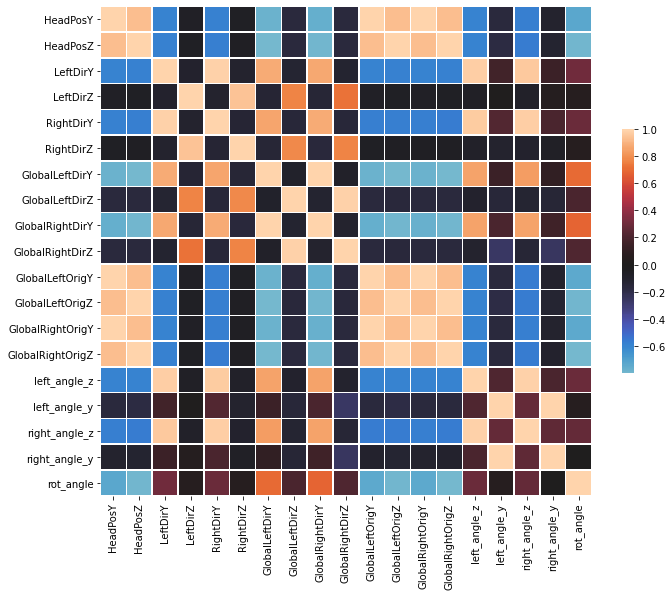

In [43]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, vmax=1, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
plot_data = test_data.copy()
plot_data['Time'] = data.Time

plot_data

,HeadPosY,HeadPosZ,LeftDirY,LeftDirZ,RightDirY,RightDirZ,GlobalLeftDirY,GlobalLeftDirZ,GlobalRightDirY,GlobalRightDirZ,GlobalLeftOrigY,GlobalLeftOrigZ,GlobalRightOrigY,GlobalRightOrigZ,left_angle_z,left_angle_y,right_angle_z,right_angle_y,rot_angle,Time
3,1.264378,-0.047329,-0.108566,0.987503,-0.106018,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,-0.102533,0.107745,-0.097563,0.142053,-0.048186,2969601
4,1.264378,-0.047329,-0.108780,0.987549,-0.105682,0.983505,-0.157472,0.980115,-0.155756,0.975813,1.266094,-0.083705,1.267519,-0.082873,-0.103069,0.107473,-0.097188,0.140192,-0.048186,2969610
5,1.264378,-0.047329,-0.108505,0.987518,-0.105179,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,-0.103302,0.107934,-0.096115,0.140594,-0.048186,2969618
6,1.264378,-0.047329,-0.108475,0.987595,-0.105286,0.983459,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,-0.103302,0.107934,-0.096115,0.140594,-0.048186,2969626
7,1.264378,-0.047329,-0.109024,0.987564,-0.104767,0.983810,-0.157971,0.980046,-0.155198,0.975836,1.266094,-0.083704,1.267492,-0.082799,-0.103081,0.107761,-0.093040,0.144974,-0.048186,2969643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,1.628254,0.591860,-0.138885,0.976822,-0.167694,0.980499,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,-0.160175,-0.193207,-0.183386,-0.122002,-0.419618,3512025
61301,1.628254,0.591860,-0.138840,0.976746,-0.182877,0.977631,-0.488857,0.839006,-0.522477,0.829013,1.636674,0.557042,1.649401,0.559827,-0.149434,-0.171022,-0.183168,-0.123567,-0.419618,3512033
61302,1.628531,0.591142,-0.139420,0.975983,-0.173172,0.979279,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,NaN,NaN,NaN,NaN,NaN,3512042
61303,1.628531,0.591142,-0.146698,0.972290,-0.172852,0.979157,-0.488478,0.838513,-0.539975,0.819551,1.636844,0.556365,1.649611,0.559020,NaN,NaN,NaN,NaN,NaN,3512050


In [45]:
def plot_table(value, a, b):
    fig, axs = plt.subplots(3, 2, figsize=(18, 11))
    fig.suptitle('Vertically stacked subplots')

    axs[0, 0].plot(plot_data.Time[a:b], plot_data[value][a:b])
    axs[0, 1].plot(plot_data.Time[a:b], plot_data['rot_angle'][a:b])
    axs[1, 0].plot(plot_data.Time[a:b], plot_data['left_angle_z'][a:b])
    axs[1, 1].plot(plot_data.Time[a:b], plot_data['left_angle_y'][a:b])
    axs[2, 0].plot(plot_data.Time[a:b], plot_data['right_angle_z'][a:b])
    axs[2, 1].plot(plot_data.Time[a:b], plot_data['right_angle_y'][a:b])

    axs[0, 0].set_title(value) 
    axs[0, 1].set_title('rot_angle')
    axs[1, 0].set_title('left_angle_z')
    axs[1, 1].set_title('right_angle_y')
    axs[2, 0].set_title('right_angle_z')
    axs[2, 1].set_title('right_angle_y')


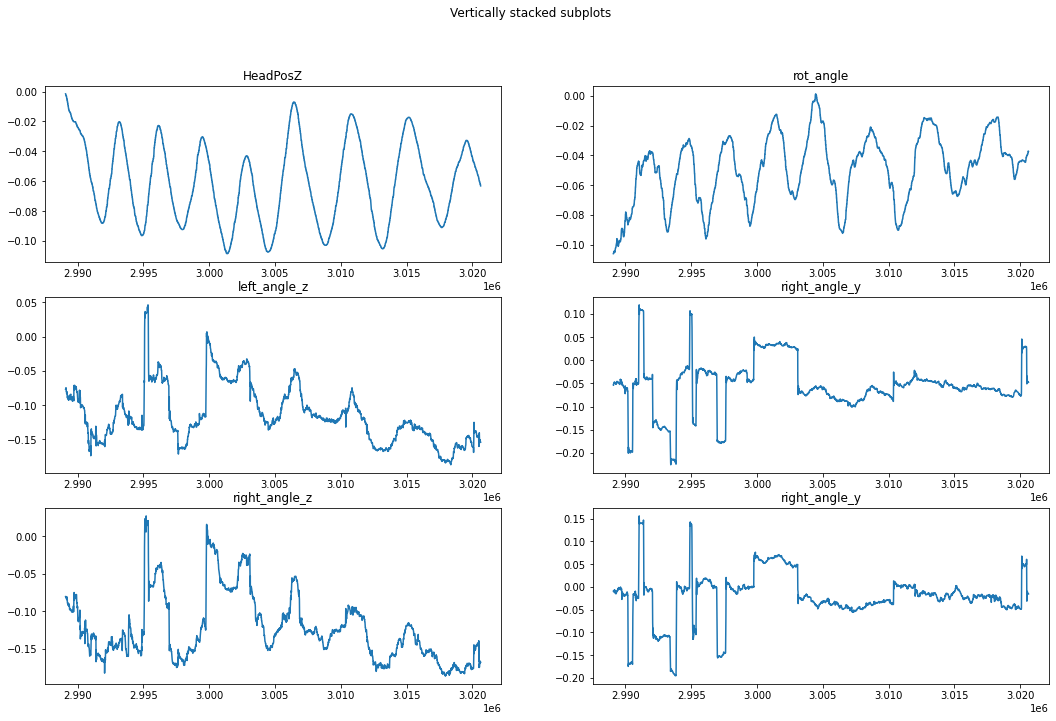

In [46]:
plot_table('HeadPosZ', 2200, 5800)

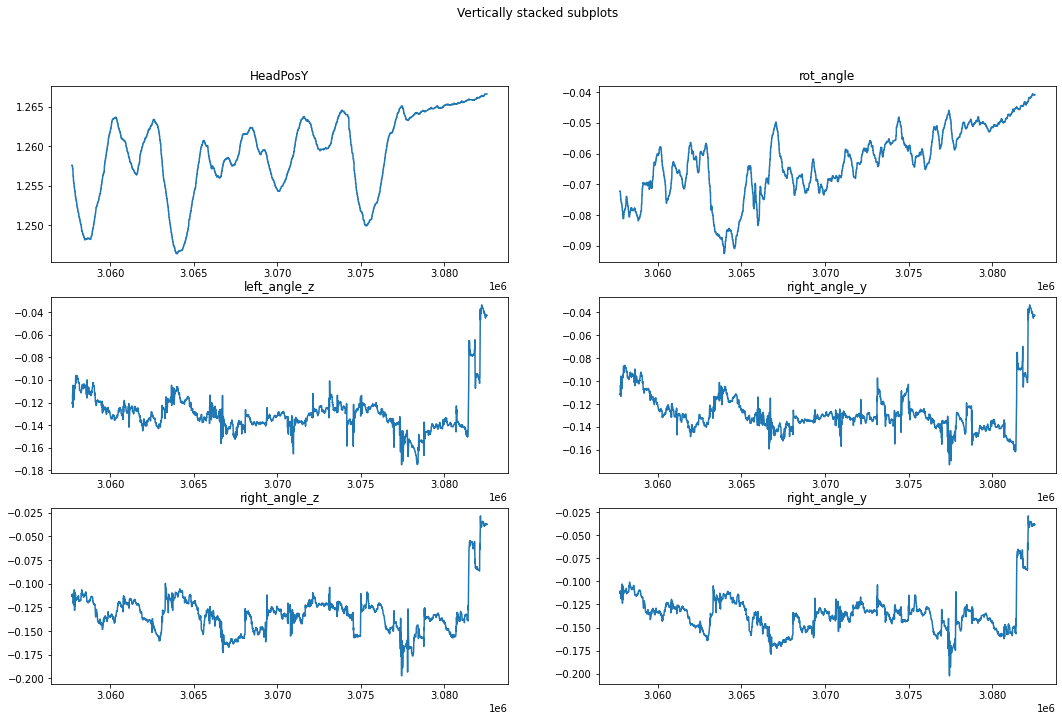

In [39]:
plot_table('HeadPosY', 10000, 12800)